In [35]:
from collections import defaultdict
import os
import pandas as pd
import librosa
import warnings
warnings.filterwarnings("ignore", message="PySoundFile failed. Trying audioread instead.")
import csv
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.manifold import TSNE



Code to for creating the csv file.
This is a MNIST Audio data 

In [36]:



directory = '/home/hiddenmist/Aman_Lakshay/EDA/free-spoken-digit-dataset-master/recordings'

data = []

for filename in os.listdir(directory):
    if filename.endswith('.wav'):
        class_name = filename.split('_')[0]
        file_path = os.path.join(directory, filename)
        print(file_path)
        data.append((file_path, class_name))

csv_filename = '/home/hiddenmist/Aman_Lakshay/EDA/temp_audio.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['path', 'label'])
    writer.writerows(data)

print(f"CSV file '{csv_filename}' created successfully.")


/home/hiddenmist/Aman_Lakshay/EDA/free-spoken-digit-dataset-master/recordings/1_nicolas_39.wav
/home/hiddenmist/Aman_Lakshay/EDA/free-spoken-digit-dataset-master/recordings/1_nicolas_38.wav
/home/hiddenmist/Aman_Lakshay/EDA/free-spoken-digit-dataset-master/recordings/7_lucas_15.wav
/home/hiddenmist/Aman_Lakshay/EDA/free-spoken-digit-dataset-master/recordings/4_george_9.wav
/home/hiddenmist/Aman_Lakshay/EDA/free-spoken-digit-dataset-master/recordings/8_jackson_19.wav
/home/hiddenmist/Aman_Lakshay/EDA/free-spoken-digit-dataset-master/recordings/1_yweweler_47.wav
/home/hiddenmist/Aman_Lakshay/EDA/free-spoken-digit-dataset-master/recordings/0_yweweler_36.wav
/home/hiddenmist/Aman_Lakshay/EDA/free-spoken-digit-dataset-master/recordings/9_jackson_20.wav
/home/hiddenmist/Aman_Lakshay/EDA/free-spoken-digit-dataset-master/recordings/2_theo_7.wav
/home/hiddenmist/Aman_Lakshay/EDA/free-spoken-digit-dataset-master/recordings/8_theo_30.wav
/home/hiddenmist/Aman_Lakshay/EDA/free-spoken-digit-dataset

Code to load data from csv and storing it to list

In [37]:

df = pd.read_csv('/home/hiddenmist/Aman_Lakshay/EDA/temp_audio.csv') 


audio_data = []
audio_label=[]
a=0
a_count=0
for index, row in df.iterrows():
    # pass
    file_path = row['path']
    label=row['label']
    audio_label.append(label)
    audio, sample_rate = librosa.load(file_path)
    a+=len(audio)
    a_count+=1
    audio_data.append((audio, sample_rate))


print("Audio file:", audio_data[0][0])
print("Sample rate:", audio_data[0][1])


Audio file: [-0.00152178 -0.00505107 -0.00713121 ... -0.00801043 -0.00610624
 -0.0026336 ]
Sample rate: 22050


Audio Padding

In [38]:
avg_a=int(a/a_count)



for idx, (audio, _) in enumerate(audio_data):
    arr = np.array(audio)

    diff = len(arr) - avg_a
    if diff < 0:  # padding
        pad_before = abs(diff) // 2
        pad_after = abs(diff) - pad_before
        arr_modified = np.pad(arr, (pad_before, pad_after), mode='constant')
    elif diff > 0:  # cropping
        crop_start = diff // 2
        crop_end = crop_start + avg_a
        arr_modified = arr[crop_start:crop_end]
    else:  # equal
        arr_modified = arr

    audio_data[idx] = (arr_modified, _) 




In [39]:
audio_map=defaultdict(list)
for (audio,_),j in zip(audio_data,audio_label):
    audio_map[j].append(audio)

Class count

In [40]:


mymap = defaultdict(int)

for i in audio_label:
    mymap[i]+=1


In [41]:
mymap

defaultdict(int,
            {1: 300,
             7: 300,
             4: 300,
             8: 300,
             0: 300,
             9: 300,
             2: 300,
             6: 300,
             5: 300,
             3: 300})

Plot for Class count

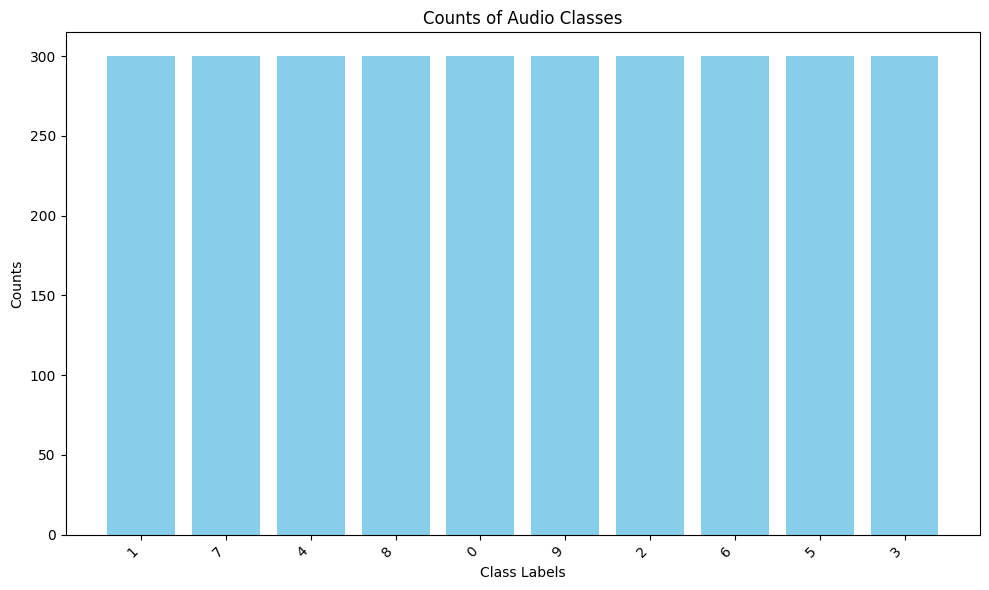

In [42]:

# Assuming mymap contains the counts for each class label
class_labels = list(mymap.keys())
class_counts = list(mymap.values())

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_counts, color='skyblue')
plt.xlabel('Class Labels')
plt.ylabel('Counts')
plt.title('Counts of Audio Classes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Set x-axis ticks at every label
plt.xticks(range(len(class_labels)), class_labels)
plt.savefig('check_balancing.png')




# Show the plot
plt.show()


In [43]:
# # importing necessary libraries
# import img2pdf
# from PIL import Image
# import os
 
# # storing image path
# img_path = "/home/hiddenmist/Aman_Lakshay/EDA/check_balancing.png"
 
# # storing pdf path
# pdf_path = "/home/hiddenmist/Aman_Lakshay/EDA/check_balancing.pdf"
 
# # opening image
# image = Image.open(img_path)
 
# # converting into chunks using img2pdf
# pdf_bytes = img2pdf.convert(image.filename)
 
# # opening or creating pdf file
# file = open(pdf_path, "wb")
 
# # writing pdf files with chunks
# file.write(pdf_bytes)
 
# # closing image file
# image.close()
 
# # closing pdf file
# file.close()
 
# # output
# print("Successfully made pdf file")

Qartile to check unbalanced classes

In [44]:
# from pypdf import PdfMerger

# # importing necessary libraries
# import img2pdf
# from PIL import Image
# import os
 
# # storing image path
# img_path = "/home/hiddenmist/Aman_Lakshay/EDA/check_balancing.png"
 
# # storing pdf path
# pdf_path = "/home/hiddenmist/Aman_Lakshay/EDA/check_balancing.pdf"
 
# # opening image
# image = Image.open(img_path)
 
# # converting into chunks using img2pdf
# pdf_bytes = img2pdf.convert(image.filename)
 
# # opening or creating pdf file
# file = open(pdf_path, "wb")
 
# # writing pdf files with chunks
# file.write(pdf_bytes)
 
# # closing image file
# image.close()
 
# # closing pdf file
# file.close()
 
# # output
# print("Successfully made pdf file")
# pdfs = ['output.pdf', 'check_balancing.pdf']

# merger = PdfMerger()

# for pdf in pdfs:
#     merger.append(pdf)

# merger.write("output.pdf")
# merger.close()

In [45]:


class_counts = list(mymap.values())


first_quartile = np.percentile(class_counts, 25)
median = np.percentile(class_counts, 50)  
third_quartile = np.percentile(class_counts, 75)

print("First Quartile:", first_quartile)
print("Median:", median)
print("Third Quartile:", third_quartile)


First Quartile: 300.0
Median: 300.0
Third Quartile: 300.0


In [46]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 6))
# plt.boxplot(class_counts, vert=False, widths=0.7, patch_artist=True)
# plt.scatter([first_quartile, median, third_quartile], [1, 1, 1], color='red', zorder=5)
# plt.xlabel('Class Counts')
# plt.title('Quartiles of Class Counts')
# plt.yticks([])
# plt.grid(True)
# plt.show()


#cannot able to plot the above due to no renderer present


Code to print the unbalanced class

In [47]:


class_names = list(mymap.keys())
class_counts = list(mymap.values())

first_quartile = np.percentile(class_counts, 25)
median = np.percentile(class_counts, 50) 
third_quartile = np.percentile(class_counts, 75)
unbal_low=[]
bal=[]
unbal_high=[]

for class_name, count in mymap.items():
    if count < first_quartile :
        print(f"Class '{class_name}' has count {count}, which means it is an MIN OUTLIER class (less).")
        unbal_low.append(class_name)
    
    elif  count > third_quartile:
        print(f"Class '{class_name}' has count {count}, which means it is an MAX OUTIER class (more).")
        unbal_high.append(class_name)
    else:
        bal.append(class_name)



In [48]:
bal

[1, 7, 4, 8, 0, 9, 2, 6, 5, 3]

Quartile for class count

Plot saved


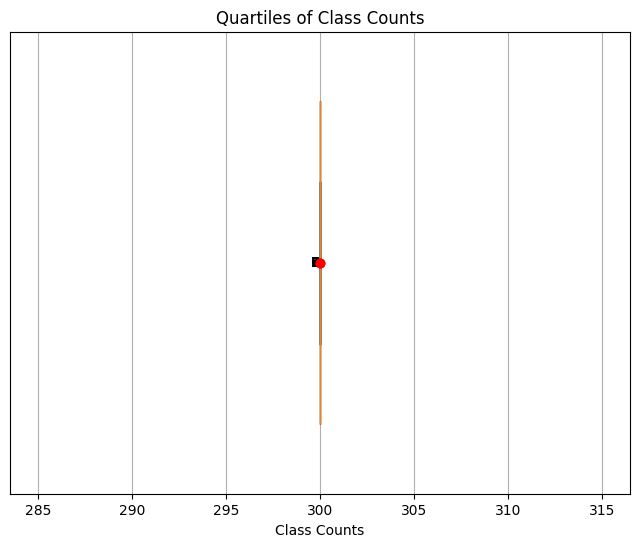

In [49]:
# Plot the quartiles
plt.figure(figsize=(8, 6))
plt.boxplot(class_counts, vert=False, widths=0.7, patch_artist=True)
plt.scatter([first_quartile, median, third_quartile], [1, 1, 1], color='red', zorder=5)
plt.xlabel('Class Counts')
plt.title('Quartiles of Class Counts')
plt.yticks([])
plt.grid(True)

for i, (count, label) in enumerate(zip(class_counts, class_names)):
    plt.text(count, 1, label, ha='right', va='center')

plt.savefig('Count_quartile.png')

print("Plot saved")


Calculating mean and std of each class

In [50]:
#mean and std of each class
class_mean = defaultdict(float)
class_std = defaultdict(float)

for (i,_),j in zip(audio_data,audio_label):
    c=np.mean(i)
    d=np.std(i)
    class_mean[j]+=c
    class_std[j]+=d

In [51]:

for label in class_mean:

    count = mymap[label]
    
    class_mean[label] /= count
    class_std[label] /= count

for label in class_mean:
    mean = class_mean[label]
    std = class_std[label]
    print(f"Class {label}: Mean = {mean}, Std = {std}")


Class 1: Mean = -0.0008604402458667544, Std = 0.04368042011745274
Class 7: Mean = -0.0009781317127144007, Std = 0.04284416129036496
Class 4: Mean = -0.0008673874499061541, Std = 0.06093609950738028
Class 8: Mean = -0.0010552885627596708, Std = 0.04974039160413667
Class 0: Mean = -0.0012463810841753305, Std = 0.055596446559454005
Class 9: Mean = -0.001240849302013037, Std = 0.044356941929630314
Class 2: Mean = -0.0008051069521981446, Std = 0.03946315795648843
Class 6: Mean = -0.0007309182758103816, Std = 0.04138550717073182
Class 5: Mean = -0.0010115838601091791, Std = 0.053845842729788276
Class 3: Mean = -0.0007665896043269645, Std = 0.04342827583895996


Quartile for mean 

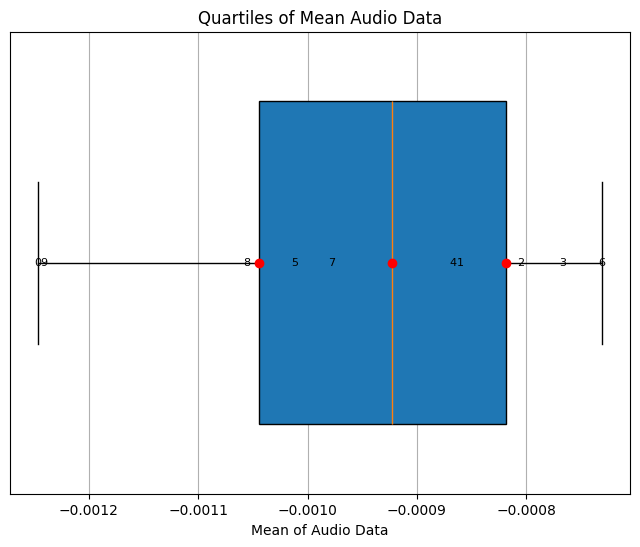

In [52]:


class_names = list(class_mean.keys())
class_means = list(class_mean.values())

first_quartile = np.percentile(class_means, 25)
median = np.percentile(class_means, 50)  
third_quartile = np.percentile(class_means, 75)

plt.figure(figsize=(8, 6))
plt.boxplot(class_means, vert=False, widths=0.7, patch_artist=True)
plt.scatter([first_quartile, median, third_quartile], [1, 1, 1], color='red', zorder=5)
plt.xlabel('Mean of Audio Data')
plt.title('Quartiles of Mean Audio Data')
plt.yticks([])
plt.grid(True)

for i, (mean, label) in enumerate(zip(class_means, class_names)):
    plt.text(mean, 1, f'{label}', ha='center', va='center', fontsize=8)

plt.savefig('mean_quartile.png')






Quartile for std


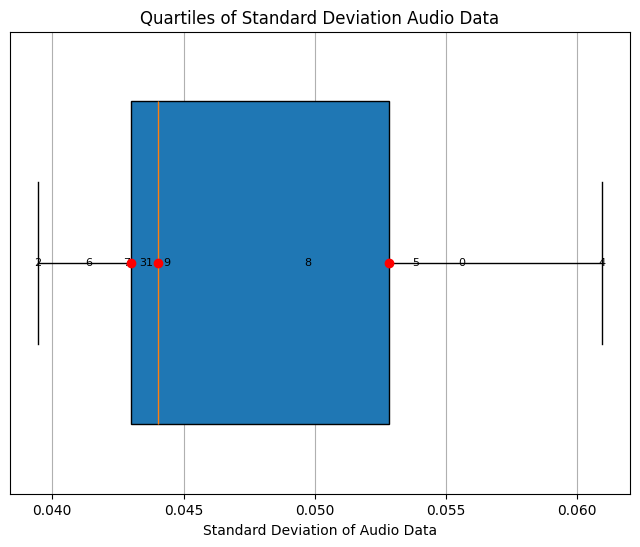

In [53]:
class_names = list(class_std.keys())
class_stds = list(class_std.values())

first_quartile = np.percentile(class_stds, 25)
median = np.percentile(class_stds, 50) 
third_quartile = np.percentile(class_stds, 75)

plt.figure(figsize=(8, 6))
plt.boxplot(class_stds, vert=False, widths=0.7, patch_artist=True)
plt.scatter([first_quartile, median, third_quartile], [1, 1, 1], color='red', zorder=5)
plt.xlabel('Standard Deviation of Audio Data')
plt.title('Quartiles of Standard Deviation Audio Data')
plt.yticks([])
plt.grid(True)

for i, (std, label) in enumerate(zip(class_stds, class_names)):
    plt.text(std, 1, f'{label}', ha='center', va='center', fontsize=8)

plt.savefig('std_quartile.png')




In [54]:
unbal_high

[]

MAX OUTLIER, MIN OUTLIER & NORMAL DATA'S (MEAN and STD)

In [55]:
def audio_list(total): #here total is one from unbal_high, unbal_low or bal
    out=[]
    for i in total:
        out+=audio_map[i]
    return out

In [56]:


def uv(data,inf):
    subset_size = int(0.7 * len(data))

    random.shuffle(data)

    u = data[:subset_size]
    v = data[subset_size:]
    
    u_new = u[:len(u)//2]
    v_new = v[:len(v)//2]
    
    avg_mean=0
    avg_std=0
    for i in u_new:
        mean=np.mean(i)
        avg_mean+=mean
        std=np.std(i)
        avg_std+=np.std(i)
    avg_mean/=len(u_new)
    avg_std/=len(u_new)
    
    avg_mean1=0
    avg_std1=0
    for i in v_new:
        mean1=np.mean(i)
        avg_mean1+=mean1
        std1=np.std(i)
        avg_std1+=np.std(i)
    avg_mean1/=len(v_new)
    avg_std1/=len(v_new)
    
    print(inf)
    print("Mean for U (Mostdata): ",avg_mean,",       Std for U (mostdata): ",avg_std)
    # print()
    print("Mean for V (Outlier): ",avg_mean1,",       Std for V (Outlier): ",avg_std1,"\n")
    # print()
    
    
    
    
    
max_out=audio_list(unbal_high)
min_out=audio_list(unbal_low)
nor_out=audio_list(bal)

uv(max_out,"MAX OUTLIER")
uv(min_out,"MIN OUTLIER")
uv(nor_out,"NORMAL DATA")

    

    

ZeroDivisionError: division by zero

In [ ]:
max_out[0]

IndexError: list index out of range

In [91]:
def cos_sim(aud1,aud2):
    

    audio_1 = aud1.reshape(1, -1)
    audio_2 = aud2.reshape(1, -1)
    c = cosine_similarity(audio_1, audio_2)
    return c
# dd=cos_sim(max_out[0],min_out[43])


list to store the audios for adjacency matrix

In [74]:
sim_list=[]


for class_label, audio_list in audio_map.items():

    random.shuffle(audio_list)
    
    selected_audios = audio_list[:10] # 4 is the samples here
    
    for audio_array in selected_audios:
        sim_list.append((audio_array, class_label))



In [84]:
len(sim_list[7][0])

9645

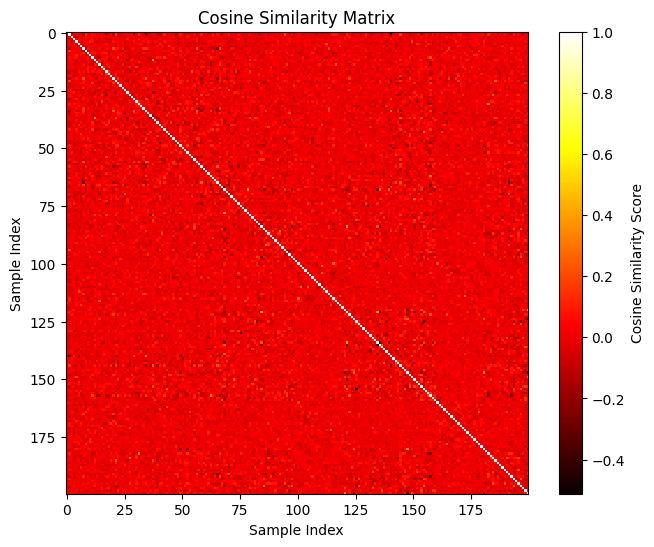

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Assuming sim_list is already populated with (audio_array, class_label) tuples

# Calculate cosine similarity scores
num_samples = len(sim_list)
cosine_sim_scores = np.zeros((num_samples, num_samples))
for i in range(num_samples):
    for j in range(num_samples):
        cosine_sim_scores[i, j] = cosine_similarity([sim_list[i][0]], [sim_list[j][0]])[0][0]

# Plot cosine similarity scores
plt.figure(figsize=(8, 6))
plt.imshow(cosine_sim_scores, cmap='hot', interpolation='nearest')
plt.colorbar(label='Cosine Similarity Score')
plt.title('Cosine Similarity Matrix')
plt.xlabel('Sample Index')
plt.ylabel('Sample Index')
plt.show()


In [ ]:
sim_list

[(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 1),
 (array([-0.01066949, -0.01110257, -0.01153948, ..., -0.00204296,
         -0.00190752, -0.00173703], dtype=float32),
  1),
 (array([-3.5778619e-05, -2.5051716e-03, -4.8606889e-03, ...,
         -2.0063689e-03, -1.5943679e-03, -1.4868223e-03], dtype=float32),
  1),
 (array([ 0.06368729,  0.05412992,  0.043944  , ..., -0.00165468,
         -0.00138186, -0.00115367], dtype=float32),
  1),
 (array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 7),
 (array([-9.1126101e-05, -1.0685566e-04, -7.0635739e-05, ...,
         -5.4982920e-05, -1.4894737e-04, -2.2342085e-04], dtype=float32),
  7),
 (array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 7),
 (array([-0.00276503, -0.00482196, -0.00429515, ..., -0.00028225,
         -0.00039872, -0.00049689], dtype=float32),
  7),
 (array([-0.00254001,  0.00051952,  0.00302497, ..., -0.00110061,
         -0.00116904, -0.00102761], dtype=float32),
  4),
 (array([0., 0., 0., ..., 0., 0., 0.], dtyp

Plotting Adjacency Matrix


In [85]:
def plot_gr(matri):

    matrix_values = np.array([[element[0][0] for element in row] for row in matri])
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix_values, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title('Heatmap of Matrix')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.show()


Adjacency Matrix 


Cosine Similarity

In [89]:
def cosine_similarity_matrix(sim_list):
    adjacency_matrix=[]
    
    for i in sim_list:
        temp=[]
        for j in sim_list:
            temp.append(cos_sim(i[0],j[0]))
        adjacency_matrix.append(temp)
    return adjacency_matrix

In [ ]:
adjacency_matrix=cosine_similarity_matrix(sim_list)
print(adjacency_matrix)

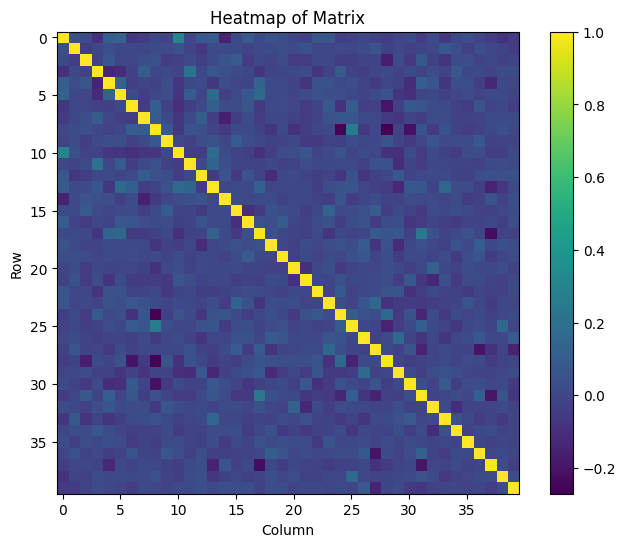

In [ ]:
plot_gr(adjacency_matrix)


Average Similarity

In [57]:
avg_sim_list=[]
for class_label, audio_list in audio_map.items():

    random.shuffle(audio_list)
    
    selected_audios = audio_list[:4] # 4 is the samples here
    average_audio = np.mean(selected_audios, axis=0)
    average_audio /= np.max(np.abs(average_audio))
    avg_sim_list.append((average_audio,class_label))


In [58]:
avg_sim_list=[]
for class_label, audio_list in audio_map.items():

    random.shuffle(audio_list)
    
    selected_audios = audio_list[:4] # 4 is the samples here
    average_audio = np.mean(selected_audios, axis=0)
    average_audio /= np.max(np.abs(average_audio))
    avg_sim_list.append((average_audio,class_label))

def avg_similarity_matrix(avg_sim_list):
    avg_adjacency_matrix=[]
    
    for i in avg_sim_list:
        temp=[]
        for j in avg_sim_list:
            temp.append(cos_sim(i[0],j[0]))
        avg_adjacency_matrix.append(temp)
    return avg_adjacency_matrix
avg_adjacency_matrix=avg_similarity_matrix(avg_sim_list)
plot_gr(avg_adjacency_matrix)


In [92]:
avg_adjacency_matrix=avg_similarity_matrix(avg_sim_list)
print(avg_adjacency_matrix)

[[array([[0.99999976]], dtype=float32), array([[0.08559795]], dtype=float32), array([[0.03643247]], dtype=float32), array([[-0.01306356]], dtype=float32), array([[0.11384366]], dtype=float32), array([[0.0885139]], dtype=float32), array([[-0.03245339]], dtype=float32), array([[-0.00761433]], dtype=float32), array([[0.00454932]], dtype=float32), array([[0.03055149]], dtype=float32)], [array([[0.08559795]], dtype=float32), array([[1.0000001]], dtype=float32), array([[0.12109566]], dtype=float32), array([[-0.04957123]], dtype=float32), array([[-0.02353479]], dtype=float32), array([[0.03503395]], dtype=float32), array([[-0.01528772]], dtype=float32), array([[0.00516707]], dtype=float32), array([[0.02429752]], dtype=float32), array([[0.04509267]], dtype=float32)], [array([[0.03643247]], dtype=float32), array([[0.12109566]], dtype=float32), array([[0.99999994]], dtype=float32), array([[0.04102993]], dtype=float32), array([[0.0513832]], dtype=float32), array([[-0.0497252]], dtype=float32), arr

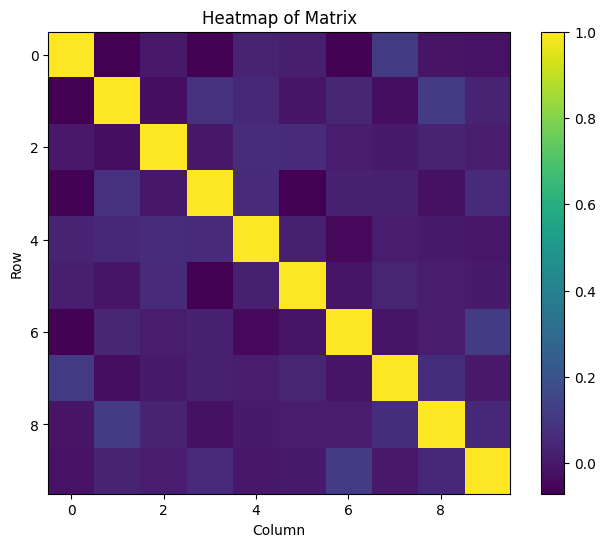

In [ ]:
plot_gr(avg_adjacency_matrix)

Occurence Similarity 

In [60]:


total_indices = len(audio_data)

mini_batch = 32

random_indices = np.random.choice(total_indices, mini_batch, replace=False)


print("Randomly selected indices:", random_indices)


Randomly selected indices: [ 648 1057 1926 2928 1155 2257 2950  418 2795  365 1045  588  808 2587
  337 1354 2502 2506  695  785 2066  680 1060 1272  852 1695 2363  537
 1967 2552 2913 2053]


In [108]:
len(audio_data[1][0])

6764

In [86]:
mini_batch_list=[]
for i in random_indices:
    mini_batch_list.append(audio_data[i])
print(mini_batch_list)


[(array([5.2330039e-02, 5.4271616e-02, 5.4710798e-02, ..., 2.9557146e-04,
       2.0325258e-04, 2.3670800e-06], dtype=float32), 22050), (array([-0.01432006, -0.00793076, -0.00266099, ..., -0.00110025,
       -0.00077586, -0.0007051 ], dtype=float32), 22050), (array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 22050), (array([-1.4237458e-02, -1.4662862e-02, -1.5007352e-02, ...,
       -3.6053301e-05, -8.7857887e-04, -1.7812977e-03], dtype=float32), 22050), (array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 22050), (array([ 0.00343086,  0.00410994,  0.00502748, ..., -0.00577975,
       -0.00655051, -0.00748345], dtype=float32), 22050), (array([-0.01393985, -0.01053592, -0.00843398, ..., -0.00133666,
       -0.00338978, -0.00548819], dtype=float32), 22050), (array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 22050), (array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 22050), (array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 22050), (array([0., 0., 0., ..., 0., 0., 0.], dtype=

In [ ]:
occu_sim=cosine_similarity_matrix(mini_batch_list)
print(occu_sim)

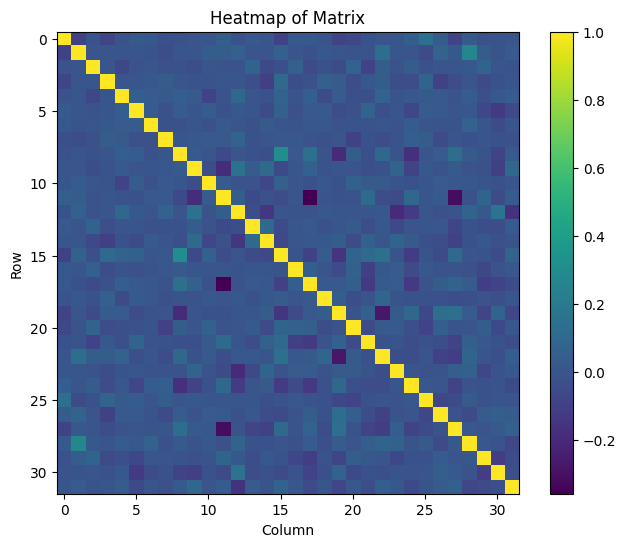

In [94]:
plot_gr(occu_sim)

In [ ]:
matri=avg_similarity_matrix(mini_batch_list)


In [63]:
len(mini_batch_list)

32

Clustering

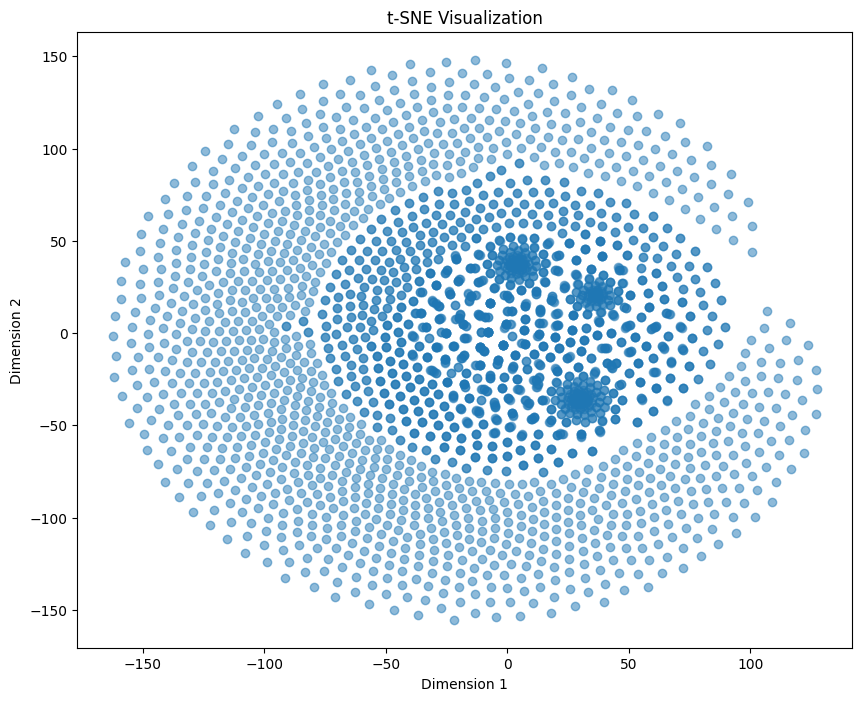

In [64]:
audio_data_new=[]
for (i,_) in audio_data:
    audio_data_new.append(i)
audio_data_new=np.array(audio_data_new)

tsne = TSNE(n_components=2, perplexity=0.001, random_state=42) # i have change to value of perplexity from 30 to this for better visuals
embedded_data = tsne.fit_transform(audio_data_new)


plt.figure(figsize=(10, 8))
plt.scatter(embedded_data[:, 0], embedded_data[:, 1], alpha=0.5)
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


In [65]:
# from sklearn.manifold import TSNE

# features = audio_data_new[:, :-1]
# labels = audio_data_new[:, -1]

# class_centroids = {}
# for label in np.unique(labels):
#     class_features = features[labels == label]
#     centroid = np.mean(class_features, axis=0) 
#     class_centroids[label] = centroid

# centroids_array = np.array(list(class_centroids.values()))

# tsne = TSNE(n_components=2, perplexity=30, random_state=42)
# embedded_centroids = tsne.fit_transform(centroids_array)

# plt.figure(figsize=(10, 8))
# plt.scatter(embedded_centroids[:, 0], embedded_centroids[:, 1], alpha=0.5)

# for i, label in enumerate(class_centroids.keys()):
#     plt.annotate(label, (embedded_centroids[i, 0], embedded_centroids[i, 1]))

# plt.title('t-SNE Visualization of Class Centroids')
# plt.xlabel('t-SNE Dimension 1')
# plt.ylabel('t-SNE Dimension 2')
# plt.show()


Pitch of first 10 audio samples

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


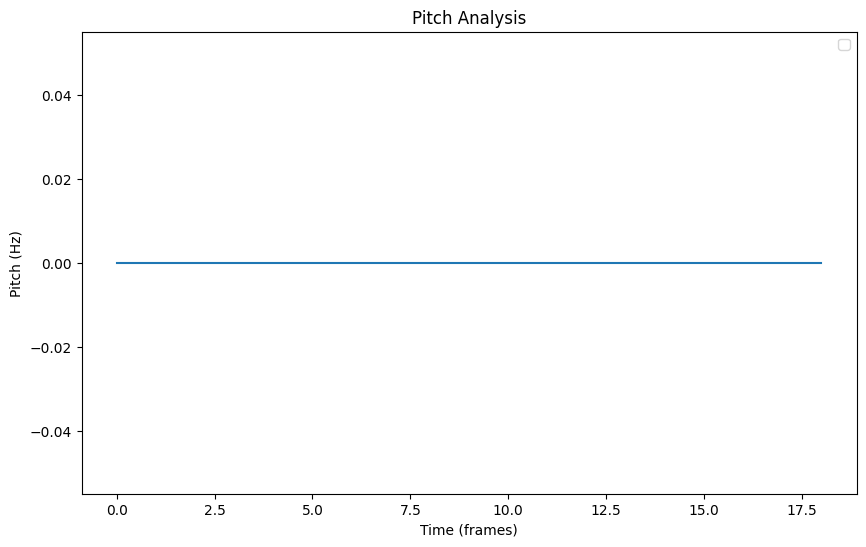

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


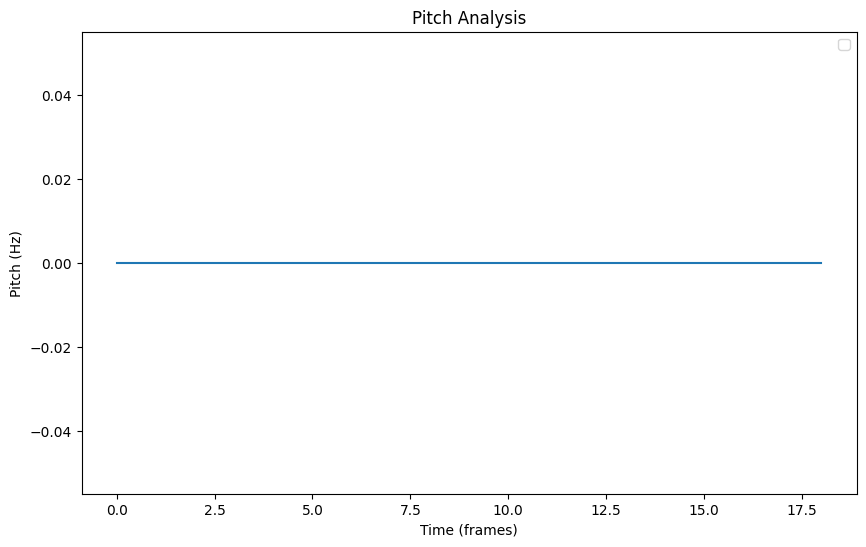

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


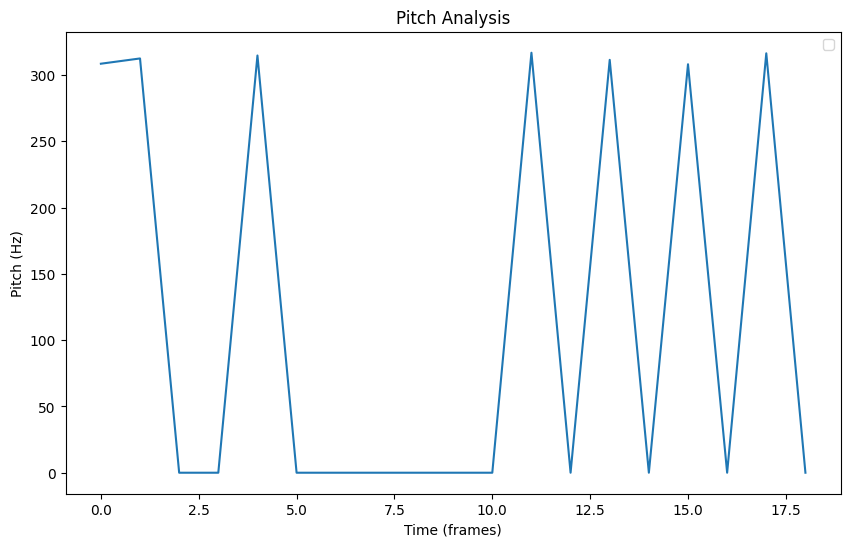

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


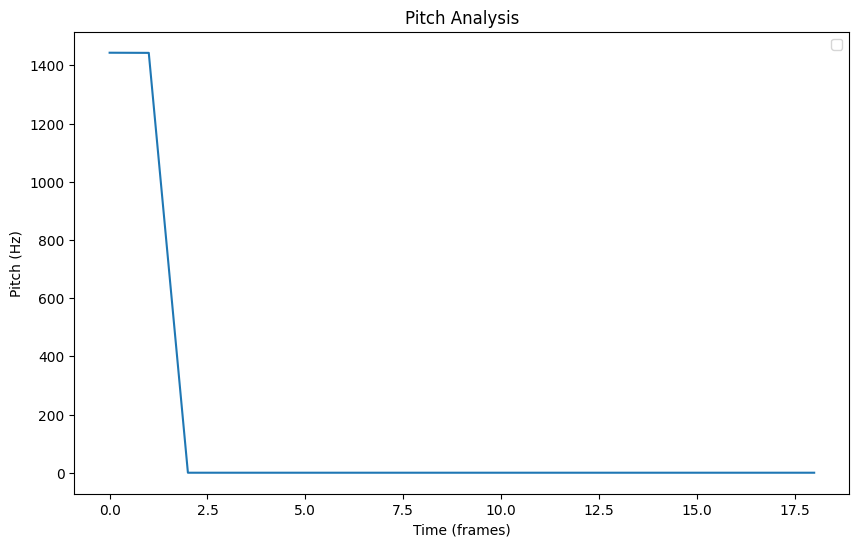

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


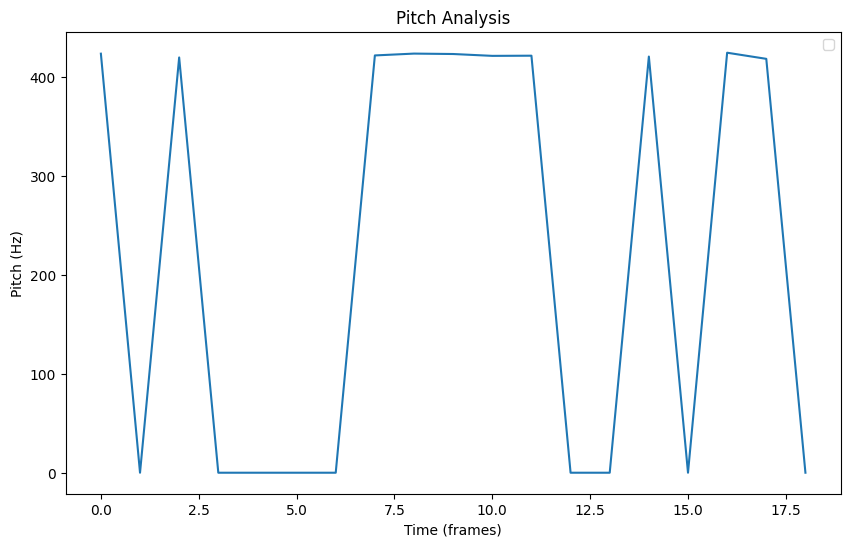

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


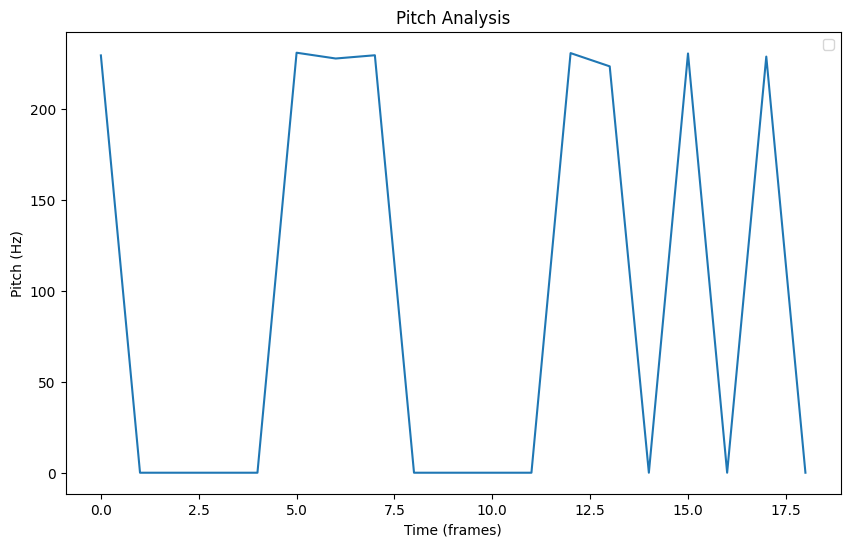

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


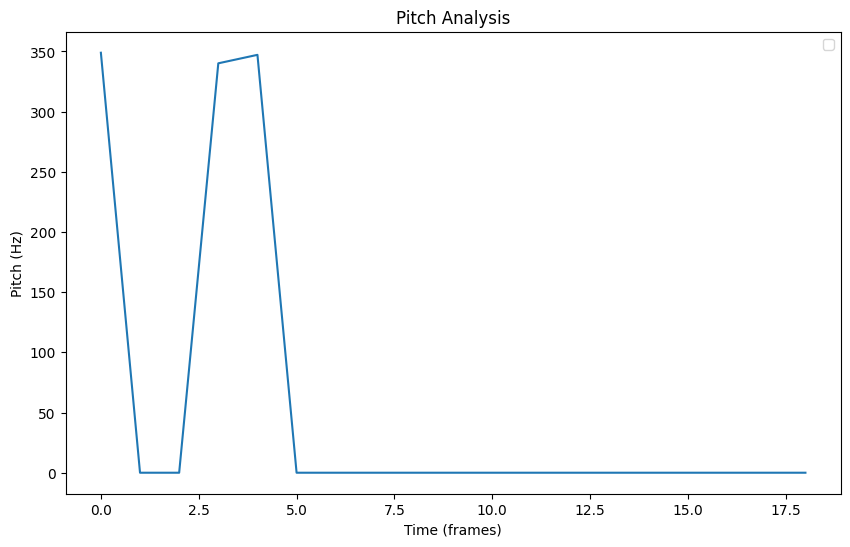

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


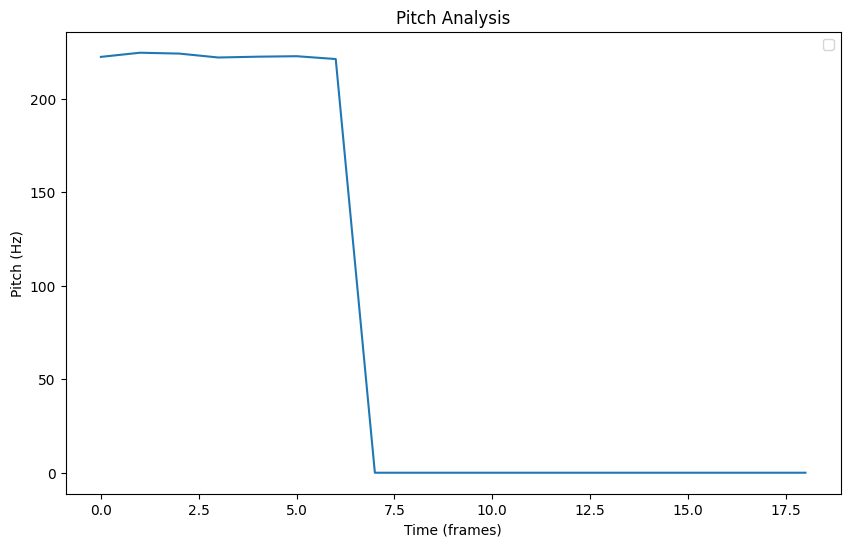

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


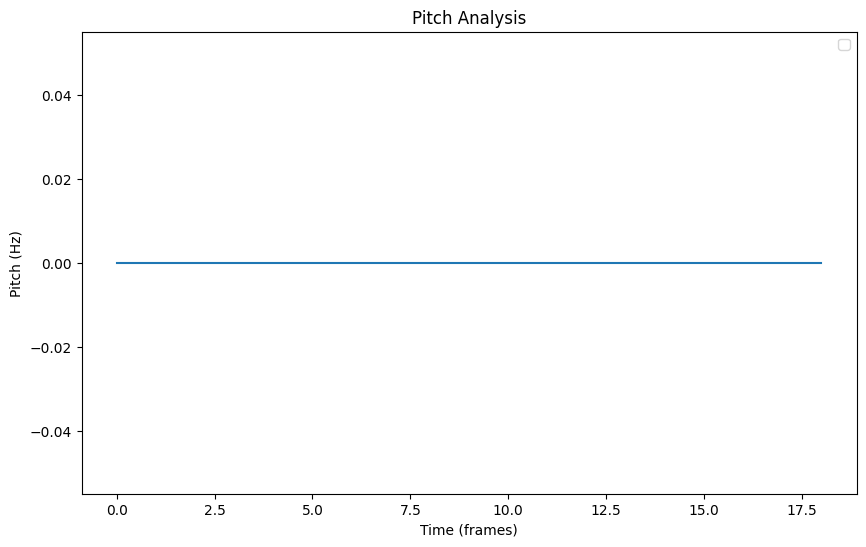

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


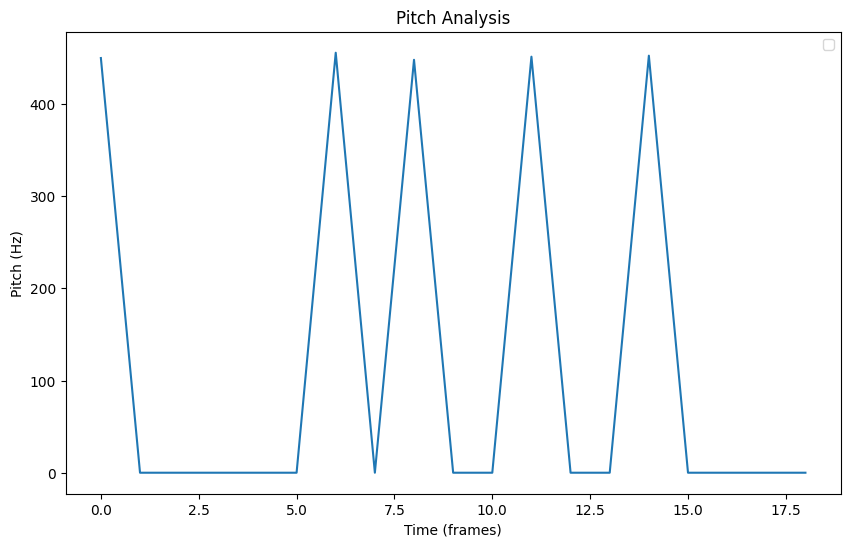

In [66]:


for num,(y,j) in enumerate(audio_data[:10]):
    pitches, magnitudes = librosa.piptrack(y=y, sr=j)

    max_magnitude_index = np.argmax(magnitudes, axis=0)

    pitch_values = pitches[max_magnitude_index]

    # Plot the pitch values
    plt.figure(figsize=(10, 6))
    plt.plot(pitch_values[0]) # can change the pitch_values[0] to pitch_values for more values
    plt.xlabel('Time (frames)')
    plt.ylabel('Pitch (Hz)')
    plt.title('Pitch Analysis')
    plt.legend()
    plt.show()


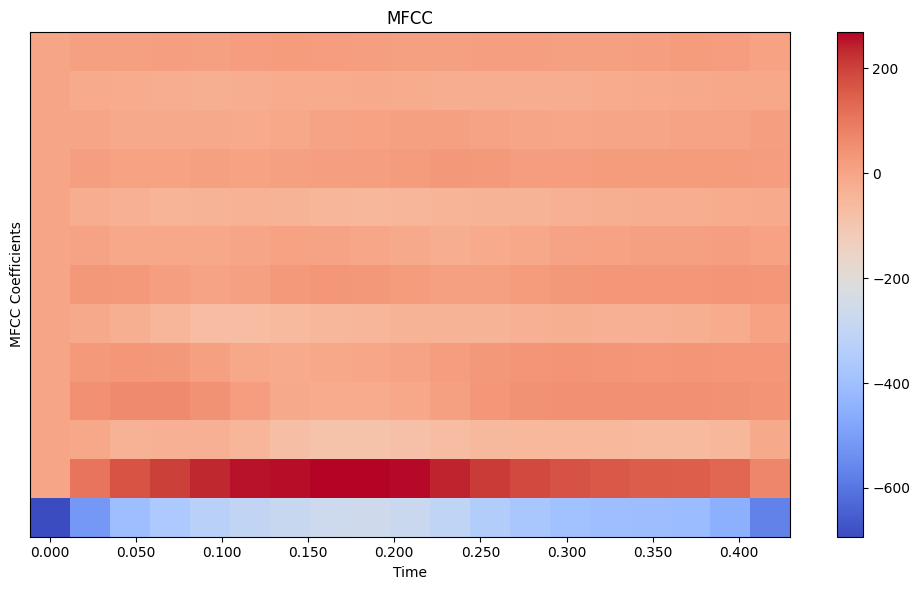

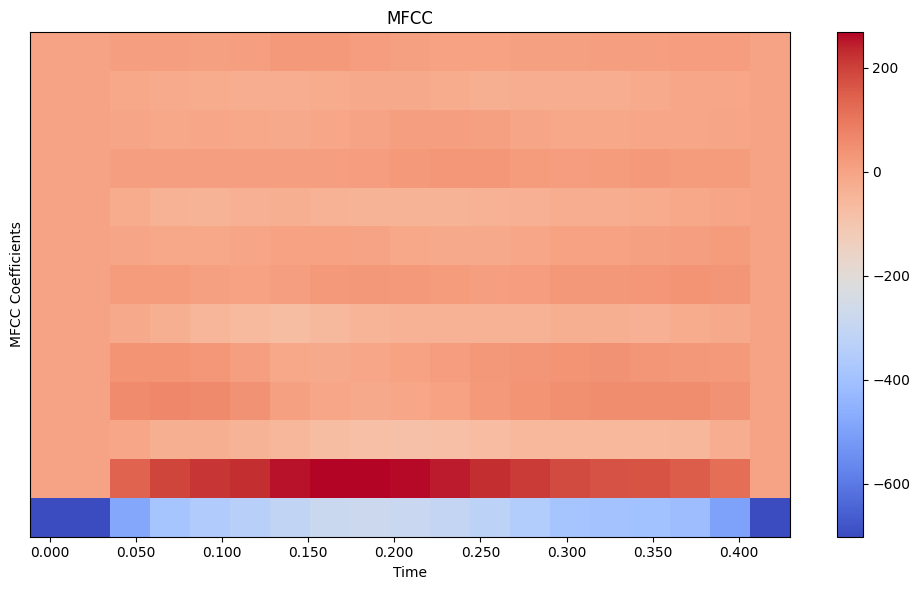

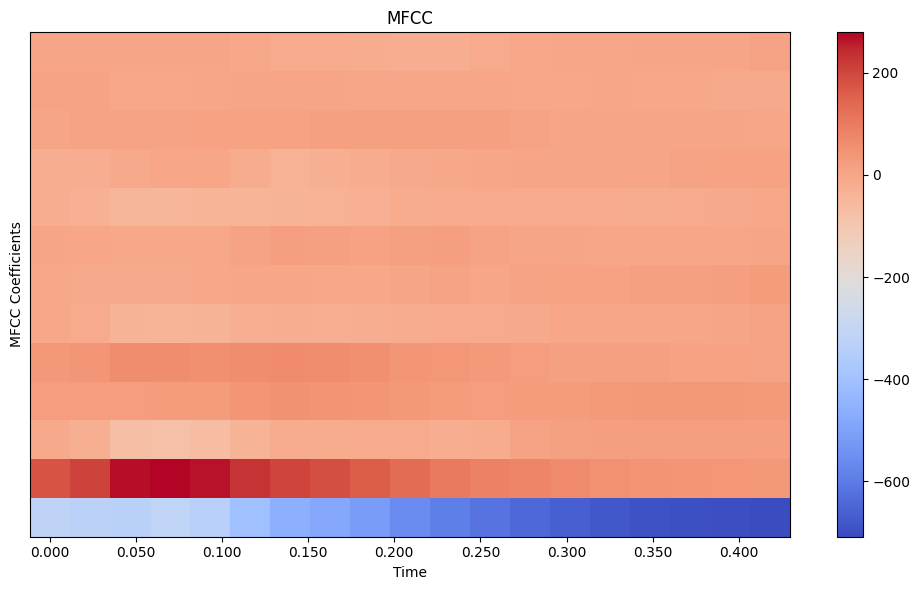

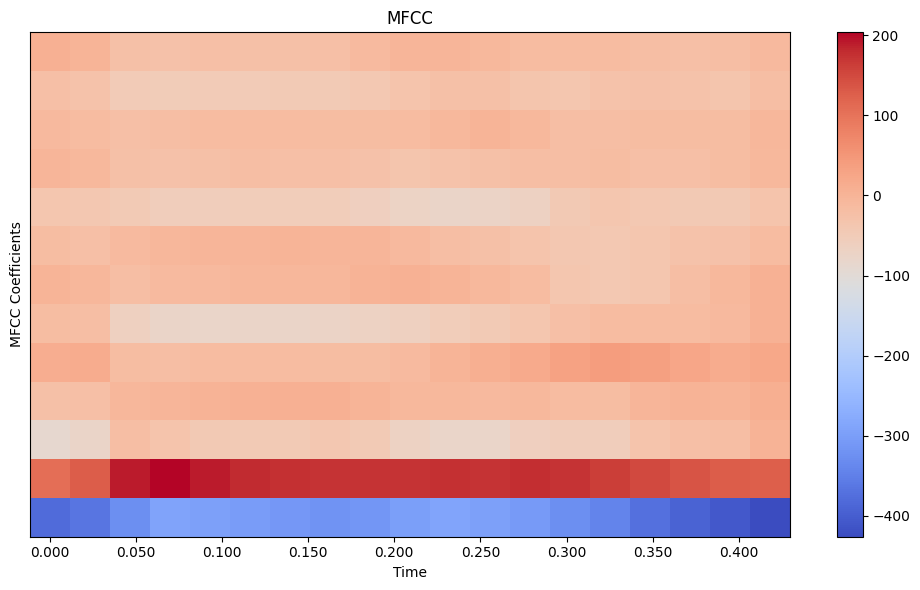

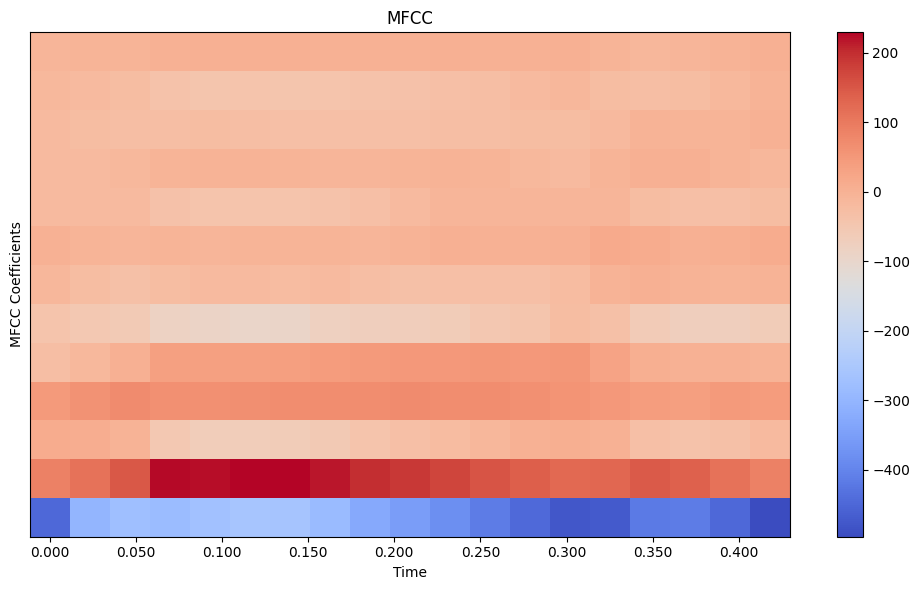

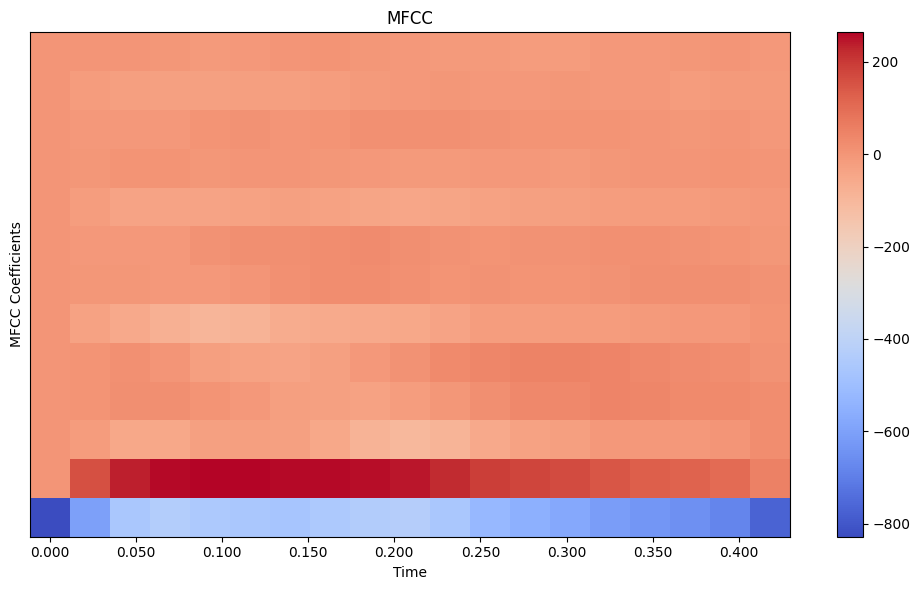

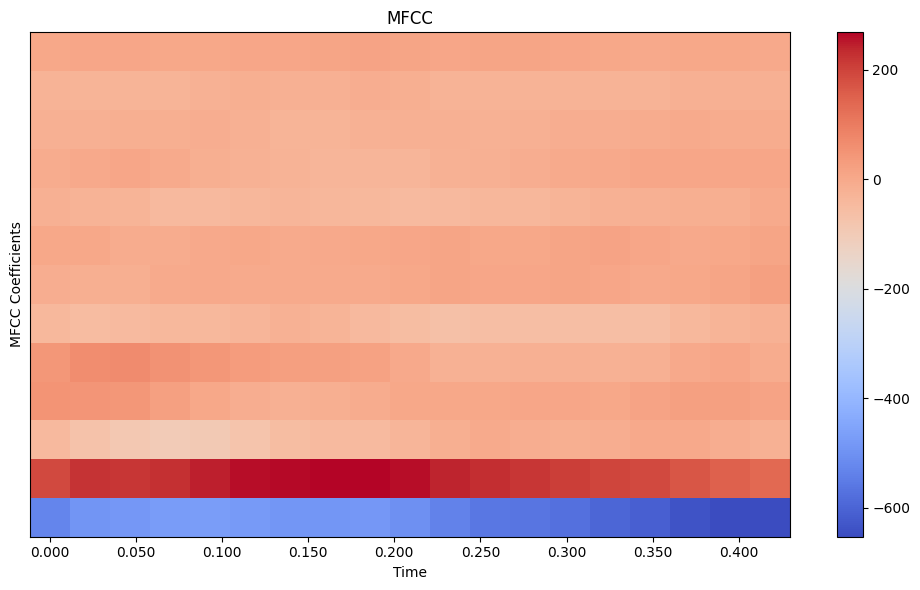

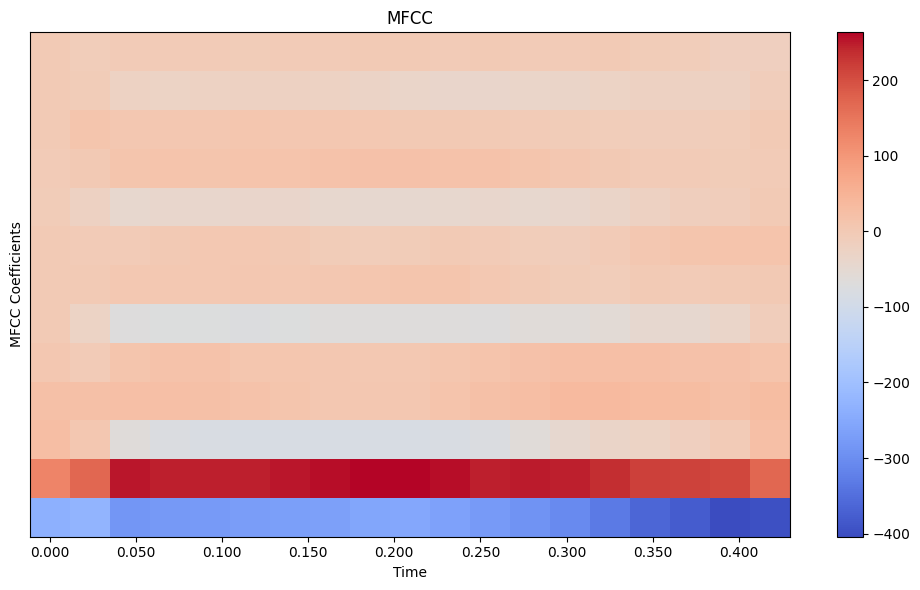

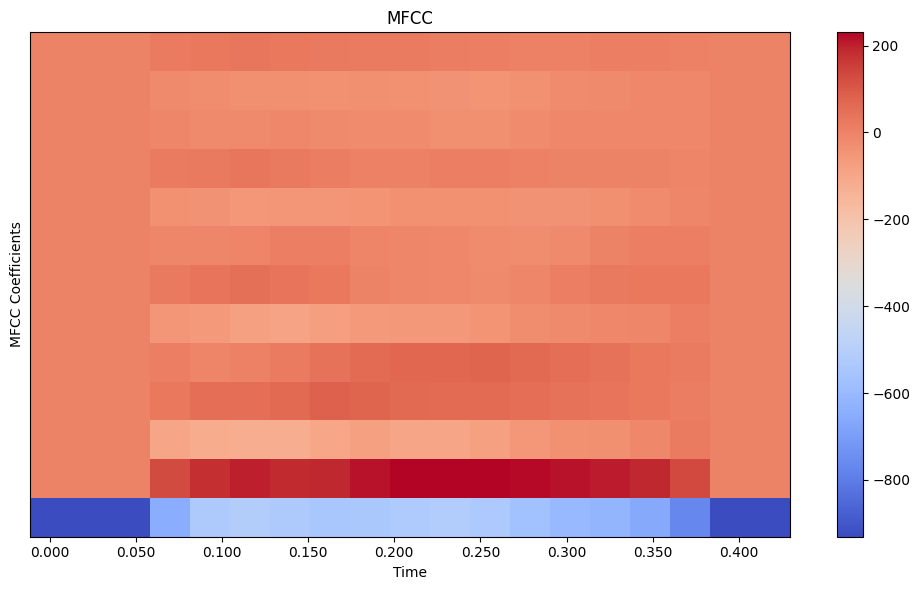

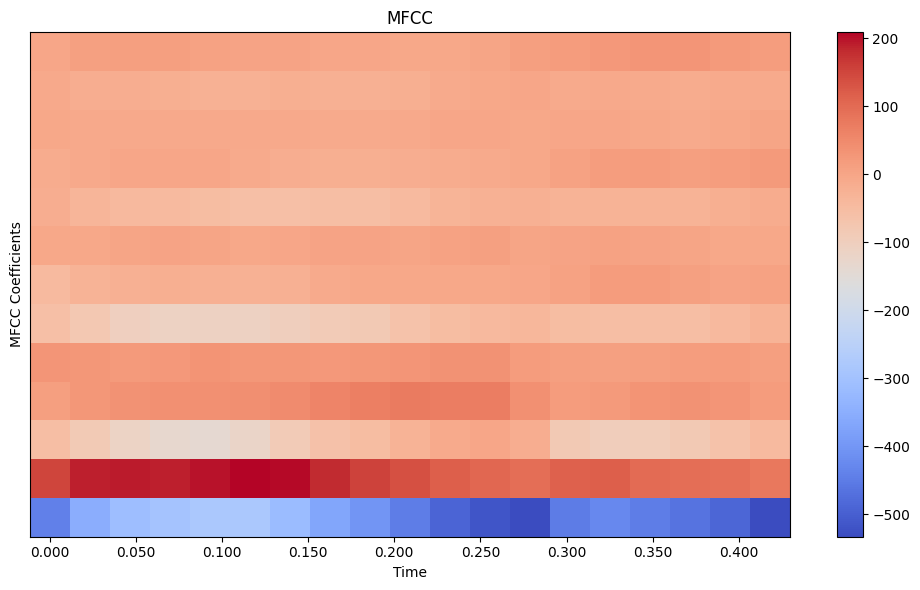

In [67]:
for num,(y,j) in enumerate(audio_data[:10]):
    pitches, magnitudes = librosa.piptrack(y=y, sr=j)

    mfccs = librosa.feature.mfcc(y=y, sr=j, n_mfcc=13)

    # Plot the MFCCs
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.xlabel('Time')
    plt.ylabel('MFCC Coefficients')
    plt.tight_layout()
    plt.show()


In [68]:
mfccs

array([[-4.42821960e+02, -3.50914978e+02, -3.11617676e+02,
        -2.96573029e+02, -2.83453003e+02, -2.82728180e+02,
        -3.16911957e+02, -3.68243988e+02, -4.05549469e+02,
        -4.49174133e+02, -4.92167877e+02, -5.18717285e+02,
        -5.33287598e+02, -4.50513428e+02, -4.28684814e+02,
        -4.48687500e+02, -4.63758118e+02, -4.89619385e+02,
        -5.32346375e+02],
       [ 1.51689041e+02,  1.89313080e+02,  1.91303116e+02,
         1.90164215e+02,  1.97260376e+02,  2.08547363e+02,
         2.03809921e+02,  1.79842926e+02,  1.55165741e+02,
         1.36984283e+02,  1.17604965e+02,  1.04634270e+02,
         9.34154358e+01,  1.13138565e+02,  1.17483810e+02,
         9.95802460e+01,  9.51099854e+01,  9.18435287e+01,
         7.81996765e+01],
       [-5.27774811e+01, -8.63671875e+01, -1.15988754e+02,
        -1.30548889e+02, -1.36565735e+02, -1.21202141e+02,
        -8.78930817e+01, -6.11041412e+01, -4.98584671e+01,
        -2.66242847e+01, -1.11293697e+01, -2.48176193e+00,
    

In [96]:
import pandas as pd
import os
import pandas_profiling
import warnings
warnings.filterwarnings("ignore", message="PySoundFile failed. Trying audioread instead.")
import csv
import matplotlib.pyplot as plt
import pdfkit
from pypdf import PdfWriter
import img2pdf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import random
from collections import defaultdict
from matplotlib.backends.backend_pdf import PdfPages
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from sklearn.manifold import TSNE
import librosa
from pandas_profiling import ProfileReport



def html_to_pdf(input_path, output_path):
    pdfkit.from_file(input_path, output_path)


## 13 MFCC FEATURES OF ANY RANDOM AUDIO, CAN ADD IN REPORT ACCODRINGLY
# Load audio file and extract MFCC features
audio_file = "/home/hiddenmist/Aman_Lakshay/VOXCELEB/EVALUATING_AUDIOS/CLASSES/id10270/5r0dWxy17C8/00003.wav"
y, sr = librosa.load(audio_file)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Create DataFrame with MFCC features
mfcc_df = pd.DataFrame(mfccs.T, columns=[f'MFCC_{i}' for i in range(1, 14)])

# Generate Pandas Profiling report
profile = pandas_profiling.ProfileReport(mfcc_df)
profile.to_file("mfcc_profile_report.html")
input_file = "mfcc_profile_report.html"
output_file = "mfcc_features.pdf"
html_to_pdf(input_file, output_file)


#Loading CSV File

directory = '/home/hiddenmist/Aman_Lakshay/EDA/free-spoken-digit-dataset-master/recordings'
path_to_csv='/home/hiddenmist/Aman_Lakshay/EDA/temp_audio.csv'
data = []

for filename in os.listdir(directory):
    if filename.endswith('.wav'):
        class_name = filename.split('_')[0]
        file_path = os.path.join(directory, filename)
        # print(file_path)
        data.append((file_path, class_name))

csv_filename = path_to_csv
with open(csv_filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['path', 'label'])
    writer.writerows(data)

print(f"CSV file '{csv_filename}' created successfully.")


#TODO: Add this class to the existing code

class AudioFeaturesExtractor:
    def __init__(self, audio_path, label):
        self.audio_path = audio_path
        self.label = label
        self.audio_data, self.sample_rate = librosa.load(audio_path)
        self.pitch = self.pitch_ex(audio_path)
        self.rms_energy = self.compute_rms_energy()
        self.spectral_centroids = self.compute_spectral_centroids()
        self.audio_length = len(self.audio_data)
        self.mean = self.audio_data.mean()
        self.std = self.audio_data.std()
        

    def pitch_ex(self,audio_file):
        audio_data, sample_rate = librosa.load(audio_file)

        pitch, _ = librosa.core.piptrack(y=audio_data, sr=sample_rate)

        pitch = pitch[np.argmax(np.sum(pitch, axis=1))]
        return pitch
    

    def compute_rms_energy(self):
        rms_energy = librosa.feature.rms(y=self.audio_data)
        return rms_energy

    def compute_spectral_centroids(self):
        spectral_centroids = librosa.feature.spectral_centroid(y=self.audio_data, sr=self.sample_rate)
        return spectral_centroids

    def length(self):
        return self.audio_length

    def get_item(self, item):
        if item == 'audio_path':
            return self.audio_path
        elif item == 'class':
            return self.label
        elif item == 'audio_length':
            return self.audio_length
        elif item == 'mean':
            return self.mean
        elif item == 'std':
            return self.std
        elif item == 'sample_rate':
            return self.sample_rate
        elif item == 'pitch':
            return self.pitch
        elif item == 'rms_energy':
            return self.rms_energy
        elif item == 'spectral_centroids':
            return self.spectral_centroids

    def to_dict(self):
        return {
            'audio_path': self.audio_path,
            'class': self.label,
            'audio_length': self.audio_length,
            'mean': self.mean,
            'std': self.std,
            'sample_rate': self.sample_rate,
            'pitch': self.pitch,
            'rms_energy': self.rms_energy,
            'spectral_centroids': self.spectral_centroids
        }
        
#Loading DataFrame
      
df = pd.read_csv(path_to_csv) 
audio_data = []
features_list=[]
audio_label=[]
a=0
a_count=0
for index, row in df.iterrows():
    # pass
    file_path = row['path']
    label=row['label']
    audio_label.append(label)
    audio, sample_rate = librosa.load(file_path)
    extractor = AudioFeaturesExtractor(file_path, label)
    
    features = extractor.to_dict()
    # mfcc_feat=cepstral_feat(file_path)
    
    features_list.append(features)
    
    a+=len(audio)
    a_count+=1
    audio_data.append((audio, sample_rate))

# Pandas Profiling part of report
df = pd.DataFrame(features_list)
profile_audio = ProfileReport(df, title='Audio Data EDA')
profile_audio.to_file("audio_data_eda.html")



input_file = "audio_data_eda.html"
output_file = "output.pdf"
output_file2="audio_eda.pdf"
html_to_pdf(input_file, output_file)
html_to_pdf(input_file, output_file2)





class classFeaturesExtractor:
    def __init__(self, audio_data, audio_label):
        self.audio_map = defaultdict(list)
        for (audio, _), j in zip(audio_data, audio_label):
            self.audio_map[j].append(audio)
            
        self.mymap = defaultdict(dict)
        for i in audio_label:
            self.mymap[i]['class_count'] = 0

        for i in audio_label:
            self.mymap[i]['class_count'] += 1

        self.class_names = list(self.mymap.keys())
        self.class_counts = [value['class_count'] for value in self.mymap.values()]

    def calculate_quartiles(self):
        self.first_quartile = np.percentile(self.class_counts, 25)
        self.median = np.percentile(self.class_counts, 50) 
        self.third_quartile = np.percentile(self.class_counts, 75)

    def determine_bal_state(self):
        for class_name, count in self.mymap.items():
            if count['class_count'] < self.first_quartile:
                print(f"Class '{class_name}' has count {count['class_count']}, which means it is a MIN OUTLIER class (less).")
                self.mymap[class_name]['bal_state (-1 means unbal_low, 0 means bal, 1 means unbal_high']=-1

            elif count['class_count'] > self.third_quartile:
                print(f"Class '{class_name}' has count {count['class_count']}, which means it is a MAX OUTLIER class (more).")
                self.mymap[class_name]['bal_state (-1 means unbal_low, 0 means bal, 1 means unbal_high']=1

            else:
                self.mymap[class_name]['bal_state (-1 means unbal_low, 0 means bal, 1 means unbal_high']=0

    def calculate_class_stats(self, audio_data, audio_label):
        class_mean = defaultdict(float)
        class_std = defaultdict(float)

        for (i, _), j in zip(audio_data, audio_label):
            c = np.mean(i)
            d = np.std(i)
            class_mean[j] += c
            class_std[j] += d

        for label in class_mean:
            count = self.mymap[label]['class_count']
            class_mean[label] /= count
            class_std[label] /= count

        for label in class_mean:
            self.mymap[label]['class_mean'] = class_mean[label]
            self.mymap[label]['class_std'] = class_std[label]

    def get_class_fea(self, label):
        count = self.mymap[label]['class_count']
        bal_state = self.mymap[label]['bal_state (-1 means unbal_low, 0 means bal, 1 means unbal_high']
        class_mean = self.mymap[label]['class_mean']
        class_std = self.mymap[label]['class_std']

        return {
            'class': label,
            'class_count': count,
            'bal_state': bal_state,
            'class_mean': class_mean,
            'class_std': class_std
            # Add more features as needed
        }

    def create_class_features_dataframe(self):
        class_features = []
        for i in self.class_names:
            class_feat = self.get_class_fea(i)
            class_features.append(class_feat)
        df_class = pd.DataFrame(class_features)
        return df_class

df=pd.read_csv(path_to_csv)
audio_data = []
features_list=[]
audio_label=[]
a=0
a_count=0
for index, row in df.iterrows():
    # pass
    file_path = row['path']
    label=row['label']
    audio_label.append(label)
    audio, sample_rate = librosa.load(file_path)
    features_list.append(features)
    a+=len(audio)
    a_count+=1
    audio_data.append((audio, sample_rate))

class_processor = classFeaturesExtractor(audio_data, audio_label)
class_processor.calculate_quartiles()
class_processor.determine_bal_state()
class_processor.calculate_class_stats(audio_data, audio_label)
df_class = class_processor.create_class_features_dataframe()

profile_audio = ProfileReport(df, title='Class Data EDA')
profile_audio.to_file("class_data_eda.html")


input_file = "class_data_eda.html"
output_file = "output1.pdf"
html_to_pdf(input_file, output_file)

class EDA_items():
    def __init__(self, path_to_csv):
        self.path_to_csv = path_to_csv
        self.df = None
        self.audio_data = []
        self.audio_label = []
        self.audio_map = defaultdict(list)
        self.mymap = defaultdict(int)
        self.avg_a = 0
        self.class_mean = {}
        self.class_std = {}
    def load_data(self):
        self.df = pd.read_csv(self.path_to_csv)
        
    def process_audio_data(self):
        a = 0
        a_count = 0
        
        for index, row in self.df.iterrows():
            file_path = row['path']
            label = row['label']
            self.audio_label.append(label)
            audio, sample_rate = librosa.load(file_path)
            a += len(audio)
            a_count += 1
            self.audio_data.append((audio, sample_rate))
            self.avg_a = int(a / a_count)

        for idx, (audio, _) in enumerate(self.audio_data):
            arr = np.array(audio)
            diff = len(arr) - self.avg_a
            if diff < 0:  # padding
                pad_before = abs(diff) // 2
                pad_after = abs(diff) - pad_before
                arr_modified = np.pad(arr, (pad_before, pad_after), mode='constant')
            elif diff > 0:  # cropping
                crop_start = diff // 2
                crop_end = crop_start + self.avg_a
                arr_modified = arr[crop_start:crop_end]
            else:  # equal
                arr_modified = arr

            self.audio_data[idx] = (arr_modified, _)

        for (audio, _), j in zip(self.audio_data, self.audio_label):
            self.audio_map[j].append(audio)

        for i in self.audio_label:
            self.mymap[i] += 1
            
    def plot_class_counts(self):
        # Assuming mymap contains the counts for each class label
        class_labels = list(self.mymap.keys())
        class_counts = list(self.mymap.values())

        # Plot the bar graph
        plt.figure(figsize=(10, 6))
        plt.bar(class_labels, class_counts, color='skyblue')
        plt.xlabel('Class Labels')
        plt.ylabel('Counts')
        plt.title('Counts of Audio Classes')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()

        # Set x-axis ticks at every label
        plt.xticks(range(len(class_labels)), class_labels)
        plt.savefig('check_balancing.png')
        
        
    def quartile_class_count(self):
        class_counts = list(self.mymap.values())

        first_quartile = np.percentile(class_counts, 25)
        median = np.percentile(class_counts, 50)  
        third_quartile = np.percentile(class_counts, 75)

        output_pdf_path = "quartile_analysis.pdf"

        # Create a PDF file to save the output
        c = canvas.Canvas(output_pdf_path, pagesize=letter)
        y = 750  # Starting y-coordinate

        c.drawString(50, y, "First Quartile: {}".format(first_quartile))
        y -= 20
        c.drawString(50, y, "Median: {}".format(median))
        y -= 20
        c.drawString(50, y, "Third Quartile: {}".format(third_quartile))
        y -= 20
        c.drawString(50, y, "Class Counts Analysis:")
        y -= 20

        for class_name, count in self.mymap.items():
            if count < first_quartile:
                text = f"Class '{class_name}' has count {count}, which means it is a MIN OUTLIER class (less)."
            elif count > third_quartile:
                text = f"Class '{class_name}' has count {count}, which means it is a MAX OUTLIER class (more)."
            else:
                text = f"Class '{class_name}' has count {count}, which is within the quartile range."
            
            # Write to PDF
            c.drawString(50, y, text)
            y -= 20

        # Save the PDF
        c.save()
    
    
    def mean_std_class(self):
        self.class_mean = defaultdict(float)
        self.class_std = defaultdict(float)

        for (i,_),j in zip(self.audio_data, self.audio_label):
            c = np.mean(i)
            d = np.std(i)
            self.class_mean[j] += c
            self.class_std[j] += d

        for label in self.class_mean:
            count = self.mymap[label]
            self.class_mean[label] /= count
            self.class_std[label] /= count

        output_pdf_path = "mean_std_analysis.pdf"

        # Create a PDF file to save the output
        c = canvas.Canvas(output_pdf_path, pagesize=letter)
        y = 750  # Starting y-coordinate

        c.drawString(50, y, "Mean and Standard Deviation Analysis:")
        y -= 20

        for label in self.class_mean:
            mean = self.class_mean[label]
            std = self.class_std[label]
            text = f"Class {label}: Mean = {mean}, Std = {std}"
            
            # Write to PDF
            c.drawString(50, y, text)
            y -= 20

        # Save the PDF
        c.save()

    def plot_mean_quartile(self):
        class_names = list(self.class_mean.keys())
        class_means = list(self.class_mean.values())

        first_quartile = np.percentile(class_means, 25)
        median = np.percentile(class_means, 50)  
        third_quartile = np.percentile(class_means, 75)

        plt.figure(figsize=(8, 6))
        plt.boxplot(class_means, vert=False, widths=0.7, patch_artist=True)
        plt.scatter([first_quartile, median, third_quartile], [1, 1, 1], color='red', zorder=5)
        plt.xlabel('Mean of Audio Data')
        plt.title('Quartiles of Mean Audio Data')
        plt.yticks([])
        plt.grid(True)

        for i, (mean, label) in enumerate(zip(class_means, class_names)):
            plt.text(mean, 1, f'{label}', ha='center', va='center', fontsize=8)

        output_pdf_path = "mean_quartile_analysis.pdf"
        plt.savefig(output_pdf_path)
        
        # print("Plot saved as:", output_pdf_path)

    def plot_std_quartile(self, output_pdf_path="std_quartile_analysis.pdf"):
        class_names = list(self.class_std.keys())
        class_stds = list(self.class_std.values())

        first_quartile = np.percentile(class_stds, 25)
        median = np.percentile(class_stds, 50)
        third_quartile = np.percentile(class_stds, 75)

        plt.figure(figsize=(8, 6))
        plt.boxplot(class_stds, vert=False, widths=0.7, patch_artist=True)
        plt.scatter([first_quartile, median, third_quartile], [1, 1, 1], color='red', zorder=5)
        plt.xlabel('Standard Deviation of Audio Data')
        plt.title('Quartiles of Standard Deviation Audio Data')
        plt.yticks([])
        plt.grid(True)

        for i, (std, label) in enumerate(zip(class_stds, class_names)):
            plt.text(std, 1, f'{label}', ha='center', va='center', fontsize=8)

        plt.savefig(output_pdf_path)
       
    def make_pdf(self,pdfs):
        merger = PdfWriter()

        for pdf in pdfs:
            merger.append(pdf)

        merger.write("output.pdf")
        merger.close()

    def cos_sim(self, aud1, aud2):
        audio_1 = aud1.reshape(1, -1)
        audio_2 = aud2.reshape(1, -1)
        return cosine_similarity(audio_1, audio_2)[0][0]

    def print_cosine_similarity_matrix(self, output_pdf_path=None):
        sim_list = []

        for class_label, audio_list in self.audio_map.items():
            random.shuffle(audio_list)
            selected_audios = audio_list[:10]  # 10 is the number of samples here
            for audio_array in selected_audios:
                sim_list.append((audio_array, class_label))

        # Calculate cosine similarity scores
        num_samples = len(sim_list)
        cosine_sim_scores = np.zeros((num_samples, num_samples))
        for i in range(num_samples):
            for j in range(num_samples):
                cosine_sim_scores[i, j] = self.cos_sim(sim_list[i][0], sim_list[j][0])

        # Generate default output PDF file name if not provided
        if output_pdf_path is None:
            output_pdf_path = 'cosine_similarity_output.pdf'

        # Write cosine similarity scores to a new PDF file
        with PdfPages(output_pdf_path) as pdf:
            for i in range(num_samples):
                for j in range(num_samples):
                    similarity_score = cosine_sim_scores[i, j]
                    pdf.savefig()
                    with open(output_pdf_path.replace('.pdf', '.txt'), 'a') as f:
                        f.write(f"Cosine similarity between sample {i+1} and sample {j+1}: {similarity_score}\n")
            plt.close()  # Move plt.close() outside of the inner loop


    def plot_gr(self, matri, title1,filename):
        matrix_values = np.array([[element[0][0] for element in row] for row in matri])
        plt.figure(figsize=(8, 6))
        plt.imshow(matrix_values, cmap='viridis', interpolation='nearest')
        plt.colorbar()
        plt.title(title1)
        plt.xlabel('Column')
        plt.ylabel('Row')
        plt.savefig(filename)

    def cos_sim(self,aud1,aud2):
    

        audio_1 = aud1.reshape(1, -1)
        audio_2 = aud2.reshape(1, -1)
        c = cosine_similarity(audio_1, audio_2)
        return c    
    
    def avg_similarity_matrix(self,avg_sim_list):
        avg_adjacency_matrix=[]
        
        for i in avg_sim_list:
            temp=[]
            for j in avg_sim_list:
                temp.append(self.cos_sim(i[0],j[0]))
            avg_adjacency_matrix.append(temp)
        return avg_adjacency_matrix
    
    def avg_adjacency_plot(self):
        avg_sim_list=[]
        for class_label, audio_list in self.audio_map.items():

            random.shuffle(audio_list)
            
            selected_audios = audio_list[:4] # 4 is the samples here
            average_audio = np.mean(selected_audios, axis=0)
            average_audio /= np.max(np.abs(average_audio))
            avg_sim_list.append((average_audio,class_label))
        avg_adjacency_matrix=self.avg_similarity_matrix(avg_sim_list)
        self.plot_gr(avg_adjacency_matrix,"Heatmap of Class_average_adjacency_matrix",'heatmap1.pdf')
        
    def cosine_similarity_matrix(self,sim_list):
        adjacency_matrix=[]
        
        for i in sim_list:
            temp=[]
            for j in sim_list:
                temp.append(self.cos_sim(i[0],j[0]))
            adjacency_matrix.append(temp)
        return adjacency_matrix
    
    def occurence_sim_plot(self):
        total_indices = len(audio_data)
        mini_batch = 32
        random_indices = np.random.choice(total_indices, mini_batch, replace=False)
        mini_batch_list=[]
        for i in random_indices:
            mini_batch_list.append(audio_data[i])
        occu_sim=self.cosine_similarity_matrix(mini_batch_list)
        self.plot_gr(occu_sim,"Heatmap of Occurence_similarity_matrix",'heatmap2.pdf') 


        

# Example usage:
def img_to_pdf(img_path,pdf_path):

    image = Image.open(img_path)
    pdf_bytes = img2pdf.convert(image.filename)
    file = open(pdf_path, "wb")
    file.write(pdf_bytes)
    image.close()
    file.close()




Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

CSV file '/home/hiddenmist/Aman_Lakshay/EDA/temp_audio.csv' created successfully.


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


In [97]:
processor = EDA_items(path_to_csv)
processor = EDA_items(path_to_csv)
processor.load_data()
processor.process_audio_data()


In [98]:
processor.occurence_sim_plot()


ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 10491 while Y.shape[1] == 9576

In [ ]:
img_to_pdf("/home/hiddenmist/Aman_Lakshay/EDA/check_balancing.png","/home/hiddenmist/Aman_Lakshay/EDA/check_balancing.pdf")

# pdfs = ['output.pdf','class_EDA.pdf', 'check_balancing.pdf','quartile_analysis.pdf','mean_std_analysis.pdf','mean_quartile_analysis.pdf','heatmap1.pdf','heatmap2.pdf']
pdfs = ['output.pdf','heatmap2.pdf']


processor = EDA_items(path_to_csv)
processor.load_data()
processor.process_audio_data()
# processor.plot_class_counts()
# processor.quartile_class_count()
# processor.mean_std_class()
# processor.plot_mean_quartile()
# processor.avg_adjacency_plot()
processor.occurence_sim_plot()
# processor.plot_std_quartile()
# processor.print_cosine_similarity_matrix()
processor.make_pdf(pdfs)